<ipython-input-5-426bc82b93da>:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-426bc82b93da>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df[gold_price_col].resample('M').mean()
<ipython-input-5-426bc82b93da>:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df[gold_price_col].resample('Y').mean()


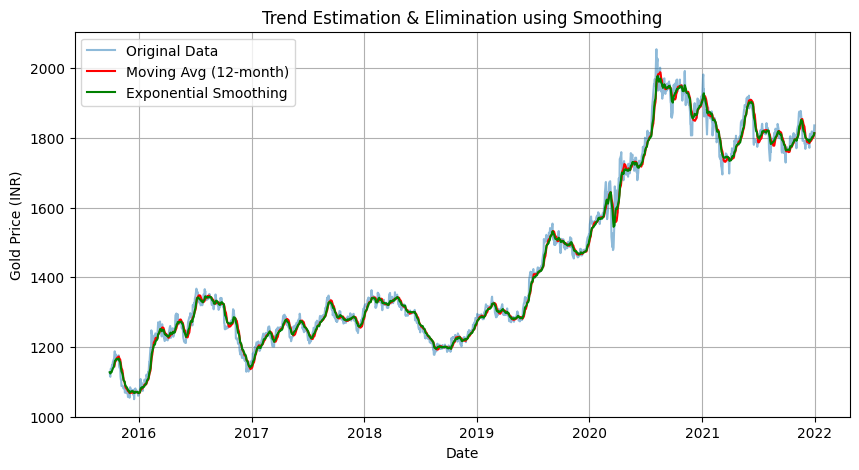

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/gold_data.csv")

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

gold_price_col = "Price"

df = df[(df['Date'].dt.year >= 2012) & (df['Date'].dt.year <= 2021)]

df.set_index('Date', inplace=True)

df_monthly = df[gold_price_col].resample('M').mean()
df_yearly = df[gold_price_col].resample('Y').mean()


df['Moving_Avg'] = df[gold_price_col].rolling(window=12).mean()


df['Exp_Smooth'] = df[gold_price_col].ewm(span=12, adjust=False).mean()


plt.figure(figsize=(10, 5))
plt.plot(df[gold_price_col], label="Original Data", alpha=0.5)
plt.plot(df['Moving_Avg'], label="Moving Avg (12-month)", color='red')
plt.plot(df['Exp_Smooth'], label="Exponential Smoothing", color='green')

plt.xlabel("Date")
plt.ylabel("Gold Price (INR)")
plt.title("Trend Estimation & Elimination using Smoothing")
plt.legend()
plt.grid()
plt.show()
